In [39]:
import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from itertools import product

## P 5.2

In [22]:
N = 100
steps = 1000

In [23]:
def clustering_coefficient(G):
    total_coefficient = 0
    
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        k = len(neighbors)
        
        if k < 2:
            continue
            
        edges_between_neighbors = 0
        for i in range(k):
            for j in range(i + 1, k):
                if G.has_edge(neighbors[i], neighbors[j]):
                    edges_between_neighbors += 1
        
        possible_edges = k * (k - 1) / 2
        node_coefficient = edges_between_neighbors / possible_edges
        total_coefficient += node_coefficient
    
    return total_coefficient / G.number_of_nodes()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.32it/s]


<Axes: xlabel='p', ylabel='clustering'>

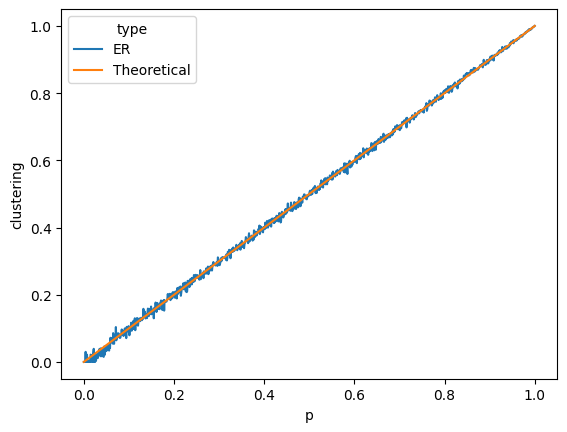

In [26]:
import seaborn as sns
import pandas as pd

data = []
for p in tqdm(np.linspace(0, 1, steps)):
    G = nx.erdos_renyi_graph(N, p, directed=False)
    data.append({'p': p, 'clustering': clustering_coefficient(G), 'type': 'ER'})
    data.append({'p': p, 'clustering': p, 'type': 'Theoretical'})

df = pd.DataFrame(data)
sns.lineplot(data=df, x='p', y='clustering', hue='type')

# P 5.3

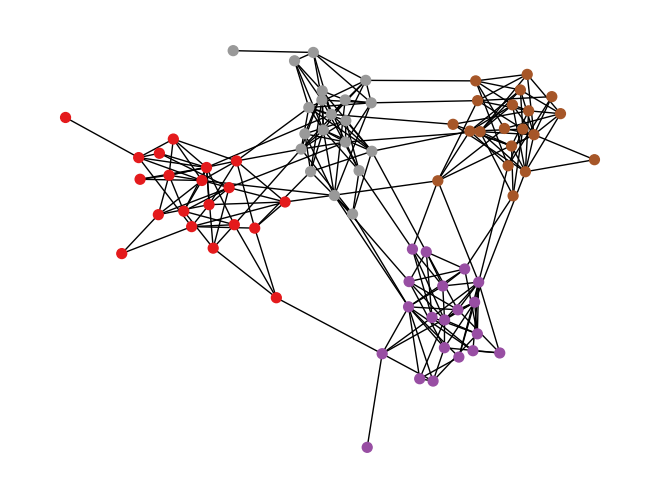

In [31]:
N, communities = 20, 4
p_within, p_between = 0.3, 0.01

G = nx.stochastic_block_model([N]*communities, 
    [[p_within, p_between, p_between, p_between],
     [p_between, p_within, p_between, p_between], 
     [p_between, p_between, p_within, p_between],
     [p_between, p_between, p_between, p_within]])

colors = [i//N for i in range(communities*N)]
nx.draw(G, node_color=colors, cmap=plt.cm.Set1, node_size=50)
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:03<00:00, 54.47it/s]


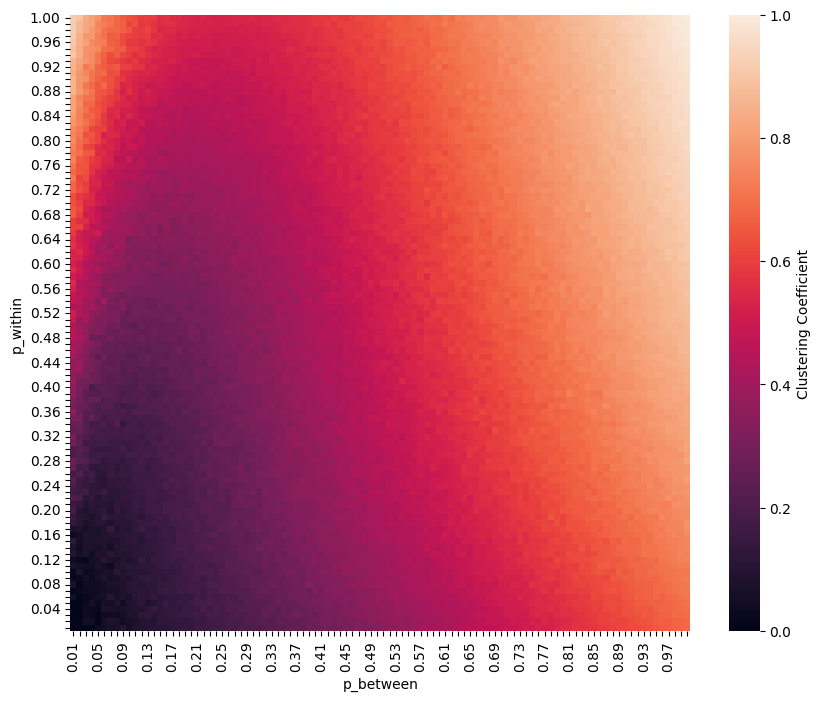

In [41]:
steps = 100

p_within_vals = np.linspace(0.01, 1.0, steps)
p_between_vals = np.linspace(0.01, 1.0, steps)

results = np.zeros((len(p_within_vals), len(p_between_vals)))

for (i, p_w), (j, p_b) in tqdm(product(enumerate(p_within_vals), enumerate(p_between_vals)), total=len(p_within_vals) * len(p_between_vals)):
    G = nx.stochastic_block_model([20]*4, 
        [[p_w, p_b, p_b, p_b],
         [p_b, p_w, p_b, p_b],
         [p_b, p_b, p_w, p_b], 
         [p_b, p_b, p_b, p_w]])
    results[i,j] = nx.average_clustering(G)

# Reverse the y-axis order
results = results[::-1]

# Heatmap with proper labels
plt.figure(figsize=(10,8))
sns.heatmap(results, 
            xticklabels=[f'{x:.2f}' if i % 4 == 0 else '' for i, x in enumerate(p_between_vals)],
            yticklabels=[f'{y:.2f}' if i % 4 == 0 else '' for i, y in enumerate(p_within_vals[::-1])],
            annot=False, cbar_kws={'label': 'Clustering Coefficient'})
plt.xlabel('p_between')
plt.ylabel('p_within')
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:59<00:00, 55.81it/s]


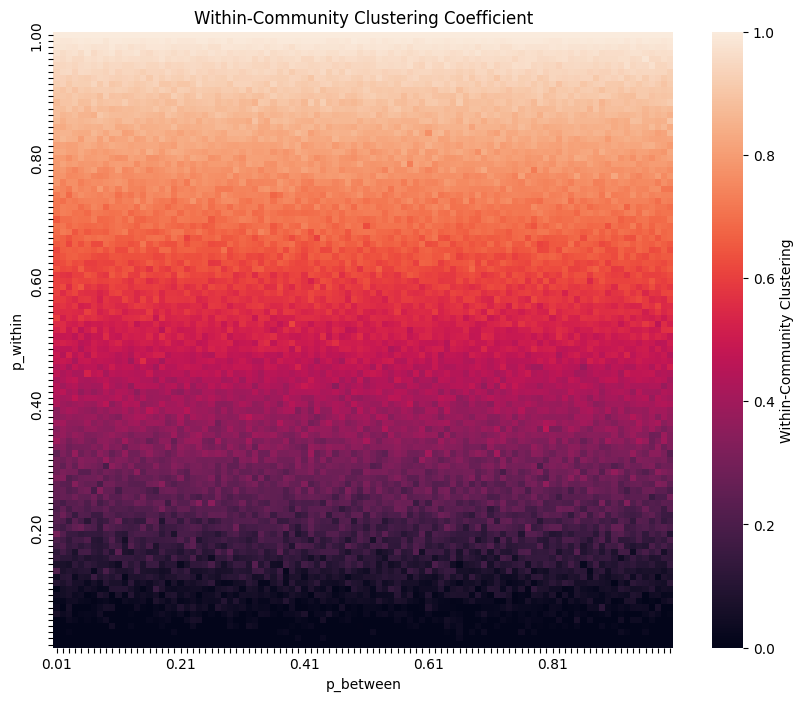

In [42]:
steps = 100

p_within_vals = np.linspace(0.01, 1.0, steps)
p_between_vals = np.linspace(0.01, 1.0, steps)

results_within = np.zeros((len(p_within_vals), len(p_between_vals)))

for (i, p_w), (j, p_b) in tqdm(product(enumerate(p_within_vals), enumerate(p_between_vals)), total=len(p_within_vals) * len(p_between_vals)):
    G = nx.stochastic_block_model([20]*4, 
        [[p_w, p_b, p_b, p_b],
         [p_b, p_w, p_b, p_b],
         [p_b, p_b, p_w, p_b], 
         [p_b, p_b, p_b, p_w]])
    
    # Calculate average clustering within communities only
    within_clustering = []
    for comm in range(4):
        nodes = list(range(comm*20, (comm+1)*20))
        subgraph = G.subgraph(nodes)
        within_clustering.append(nx.average_clustering(subgraph))
    
    results_within[i,j] = np.mean(within_clustering)

# Reverse the y-axis order
results_within = results_within[::-1]

# Heatmap with proper labels
plt.figure(figsize=(10,8))
sns.heatmap(results_within, 
            xticklabels=[f'{x:.2f}' if i % 20 == 0 else '' for i, x in enumerate(p_between_vals)],
            yticklabels=[f'{y:.2f}' if i % 20 == 0 else '' for i, y in enumerate(p_within_vals[::-1])],
            annot=False, cbar_kws={'label': 'Within-Community Clustering'})
plt.xlabel('p_between')
plt.ylabel('p_within')
plt.title('Within-Community Clustering Coefficient')
plt.show()